**LGMVIP - Data Science Intern, September-2022**

**AUTHOR Name - Shaikh Zainab**

**02 INTERMEDIATE LEVEL task**

**2) Prediction using Decision Tree  Algorithm :**

Create the Decision Tree classifier and visualize it graphically. 

The purpose is if we feed any new data to this classifier, it would be able to  predict the right class accordingly.  

**Step 1 : Data Collection**

**Importing the Libraries**

In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

**Reading the Dataset**

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Lets Grow More Dataset/Iris.csv")
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [ ]:
df = df.drop(['Id'],axis=1)

**Description of the data**

In [ ]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


**Information about the DataFrame**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


**Number of rows and columns**

In [ ]:
df.shape

(150, 5)

**Step 3 : Checking Nulls**

In [ ]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

**Step 4 : Data Visualization**

**Boxplot**

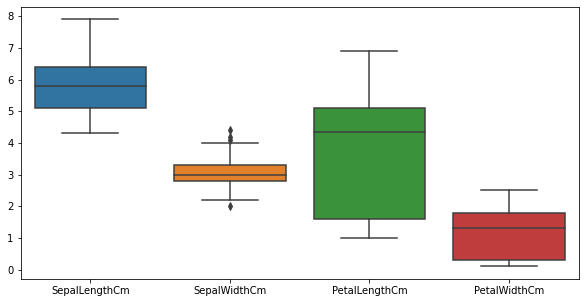

In [ ]:
plt.figure(figsize = (10,5))
sns.boxplot(data = df)
plt.show()

**HeatMap**

**Correlation among the columns**

In [ ]:
cor = df.corr()
cor

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


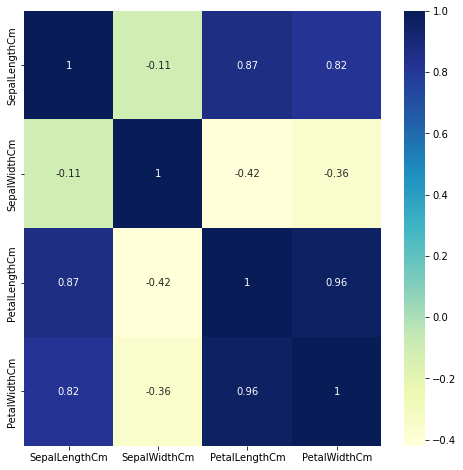

In [ ]:
plt.figure(figsize = (8,8))
sns.heatmap(df.corr(), annot=True, cmap="YlGnBu")
plt.show()

**Step 5 : Data Transformation**

We know that Machine Learning does not takes the input as categorical values it takes in the form of numerical values so we need to convert the categorical values to numerical values using LabelEncoder.

**Unique values**

In [ ]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Species'] = le.fit_transform(df['Species'])
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


**Indexes**

In [ ]:
X = df.iloc[:,0:4]
Y = df.iloc[:,-1:]

**Step 6 : Model Building**



Scikit-learn’s train_test_split function allow us to shuffle and split the dataset in a single line. The function takes a sequence of arrays (the arrays must be of the same length) and options to specify how to split the arrays. By default, the function extracts 75% of the rows in the arrays as the training set while the remaining 25% of rows is declared as the test set.

Deciding how much data you want to put into the training and the test set respectively is somewhat arbitrary, but using a test set containing 25% of the data is a good rule of thumb.

The function also allow us to control the shuffling applied to the data before applying the split with the option random_state, this ensures reproducible results.

X is having all the independent variables and Y is having dependent variable.


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.25,random_state = 0)


In [ ]:
X_train.shape

(112, 4)

In [ ]:
Y_train.shape

(112, 1)

Here we are using DecisionTreeClassifier to predict our data After that fitting/training the model on X_train and Y_train by using .fit() method.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train,Y_train)

DecisionTreeClassifier()

Then we are predicting on X_test by using .predict() method. And checking accuracy how are model is accurate or how it is properly worikng on data

In [ ]:
from sklearn.metrics import accuracy_score
prediction = dt.predict(X_test)
print("Accuracy:",accuracy_score(Y_test,prediction))

Accuracy: 0.9736842105263158


In [ ]:
from sklearn.metrics import classification_report
print("Report:",classification_report(Y_test,prediction))

Report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.94      0.97        16
           2       0.90      1.00      0.95         9

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38



For this model, the accuracy on the test set is 0.97, which means the model made the right prediction for 97% of the irises in the given dataset. We can expect the model to be correct 97% of the time for predicting the species of new irises.

In [ ]:
clsVars = "Species"
allCols = df.columns
print(clsVars)
# counts
print("\n*** Counts ***")
print(df.groupby(df[clsVars]).size())

Species

*** Counts ***
Species
0    50
1    50
2    50
dtype: int64


In [ ]:
from sklearn import tree
text_tree = tree.export_text(dt)
print("\n*** Decision Tree Text ***")
print(text_tree)


*** Decision Tree Text ***
|--- feature_2 <= 2.35
|   |--- class: 0
|--- feature_2 >  2.35
|   |--- feature_2 <= 4.95
|   |   |--- feature_3 <= 1.65
|   |   |   |--- class: 1
|   |   |--- feature_3 >  1.65
|   |   |   |--- feature_1 <= 3.10
|   |   |   |   |--- class: 2
|   |   |   |--- feature_1 >  3.10
|   |   |   |   |--- class: 1
|   |--- feature_2 >  4.95
|   |   |--- feature_2 <= 5.05
|   |   |   |--- feature_0 <= 6.50
|   |   |   |   |--- class: 2
|   |   |   |--- feature_0 >  6.50
|   |   |   |   |--- class: 1
|   |   |--- feature_2 >  5.05
|   |   |   |--- class: 2



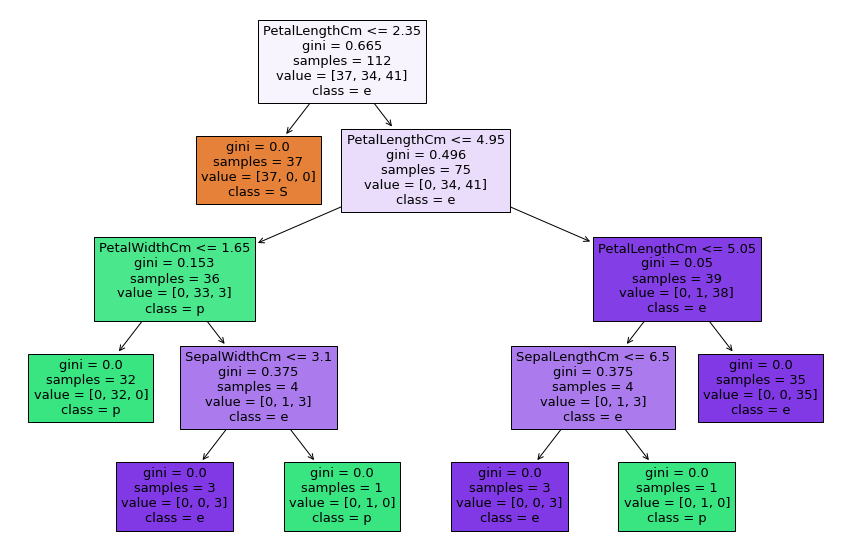

In [ ]:
fig = plt.figure(figsize=(15,10))
tree.plot_tree(dt, feature_names=allCols,  class_names=clsVars, filled=True)
plt.show()